In [108]:
import pandas as pd

df=pd.read_excel('synthetic_purchase_data.xlsx')
df 

,DATE,PARTY_NAME
0,2024-04-01 00:00:00.000,THE MEDICURE CHEMISTS
1,2024-04-02 00:00:00.000,THE MEDICURE CHEMISTS
2,2024-04-02 00:00:00.000,JBC HEALTHCARE & RESEARCH PRIV
3,2024-04-02 00:00:00.000,ANUSUYYA BASU
4,2024-04-02 00:00:00.000,MEHER LIFECARE PRIVATE LIMITED
...,...,...
12016,2025-05-17 17:15:08.324,William Watson
12017,2024-11-15 17:15:08.324,Andrew Schmidt
12018,2025-02-26 17:15:08.324,Brett Atkinson
12019,2025-05-14 17:15:08.324,Margaret Schwartz


In [109]:
import datetime as dt
from datetime import date
df['DATE']=pd.to_datetime(df['DATE'])
# Sort data into ascending order
df=df.sort_values('DATE',ascending=True)
df

,DATE,PARTY_NAME
0,2024-04-01 00:00:00.000,THE MEDICURE CHEMISTS
1,2024-04-02 00:00:00.000,THE MEDICURE CHEMISTS
2,2024-04-02 00:00:00.000,JBC HEALTHCARE & RESEARCH PRIV
3,2024-04-02 00:00:00.000,ANUSUYYA BASU
4,2024-04-02 00:00:00.000,MEHER LIFECARE PRIVATE LIMITED
...,...,...
11128,2025-06-22 17:15:08.322,Chris Kirk
11623,2025-06-22 17:15:08.323,Amy Henderson
11739,2025-06-22 17:15:08.323,Jean Huffman
11848,2025-06-22 17:15:08.323,William Barker


In [110]:
summary = df.groupby('PARTY_NAME').agg(
    first_purchase=('DATE', 'min'),
    last_purchase=('DATE', 'max'),
    total_purchases=('DATE', 'count')
).reset_index()
summary['tenure_days'] = (summary['last_purchase'] - summary['first_purchase']).dt.days
summary['tenure_days'] = summary['tenure_days'].replace(0, 1)
summary['expected_interval'] = summary['tenure_days'] / summary['total_purchases']
summary['expected_interval'] = round(summary['expected_interval']) 
today = pd.to_datetime('2025-06-22')
summary['days_since_last_purchase'] = (today - summary['last_purchase']).dt.days
summary['status'] = summary.apply(
    lambda row: 'Churn' if row['days_since_last_purchase'] > row['expected_interval'] else 'Active',
    axis=1
)

summary


,PARTY_NAME,first_purchase,last_purchase,total_purchases,tenure_days,expected_interval,days_since_last_purchase,status
0,APOLLO SINDOORI HOTELS LIMITED,2024-05-01 00:00:00.000,2024-05-01 00:00:00.000,1,1,1.0,417,Churn
1,Apel sk,2024-05-27 00:00:00.000,2024-05-27 00:00:00.000,1,1,1.0,391,Churn
2,Bharati Ghosh,2024-08-07 00:00:00.000,2024-08-07 00:00:00.000,1,1,1.0,319,Churn
3,Puja Rungta,2024-05-15 00:00:00.000,2024-05-15 00:00:00.000,1,1,1.0,403,Churn
4,Rani pharmacy,2025-05-13 00:00:00.000,2025-05-13 00:00:00.000,1,1,1.0,40,Churn
...,...,...,...,...,...,...,...,...
1324,William Smith,2024-06-23 17:15:08.306,2025-05-04 17:15:08.307,5,315,63.0,48,Active
1325,William Thompson,2024-09-01 17:15:08.310,2025-05-15 17:15:08.317,10,256,26.0,37,Churn
1326,William Walker,2024-10-24 17:15:08.305,2025-05-18 17:15:08.318,5,206,41.0,34,Active
1327,William Watson,2024-07-27 17:15:08.313,2025-05-19 17:15:08.317,7,296,42.0,33,Active


In [111]:
summary['status'].value_counts()

status
Churn     707
Active    622
Name: count, dtype: int64

In [112]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
label=LabelEncoder()
scaler=StandardScaler()

summary['status']=label.fit_transform(summary['status'])
summary['total_purchases']=scaler.fit_transform(summary[['total_purchases']])
summary['tenure_days']=scaler.fit_transform(summary[['tenure_days']])
summary['expected_interval']=scaler.fit_transform(summary[['expected_interval']])
summary['days_since_last_purchase']=scaler.fit_transform(summary[['days_since_last_purchase']])
summary


,PARTY_NAME,first_purchase,last_purchase,total_purchases,tenure_days,expected_interval,days_since_last_purchase,status
0,APOLLO SINDOORI HOTELS LIMITED,2024-05-01 00:00:00.000,2024-05-01 00:00:00.000,-1.256461,-2.046331,-1.605462,3.187746,1
1,Apel sk,2024-05-27 00:00:00.000,2024-05-27 00:00:00.000,-1.256461,-2.046331,-1.605462,2.944671,1
2,Bharati Ghosh,2024-08-07 00:00:00.000,2024-08-07 00:00:00.000,-1.256461,-2.046331,-1.605462,2.271539,1
3,Puja Rungta,2024-05-15 00:00:00.000,2024-05-15 00:00:00.000,-1.256461,-2.046331,-1.605462,3.056859,1
4,Rani pharmacy,2025-05-13 00:00:00.000,2025-05-13 00:00:00.000,-1.256461,-2.046331,-1.605462,-0.336847,1
...,...,...,...,...,...,...,...,...
1324,William Smith,2024-06-23 17:15:08.306,2025-05-04 17:15:08.307,-0.631756,0.587696,2.121768,-0.262055,0
1325,William Thompson,2024-09-01 17:15:08.310,2025-05-15 17:15:08.317,0.149125,0.092767,-0.102547,-0.364894,1
1326,William Walker,2024-10-24 17:15:08.305,2025-05-18 17:15:08.318,-0.631756,-0.326664,0.799203,-0.392942,0
1327,William Watson,2024-07-27 17:15:08.313,2025-05-19 17:15:08.317,-0.319403,0.428312,0.859319,-0.402291,0


In [113]:
X=summary[['total_purchases','tenure_days','expected_interval','days_since_last_purchase']]
Y=summary['status']

In [114]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)


In [115]:
# from imblearn.under_sampling import RandomUnderSampler
# import matplotlib.pyplot as plt
# rus=RandomUnderSampler(random_state=42)

# x_resampled,y_resampled=rus.fit_resample(X_train,Y_train)


# plt.figure(figsize=(10, 5))


# plt.scatter(
#     x_resampled[y_resampled == 0].iloc[:, 0], 
#     x_resampled[y_resampled == 0].iloc[:, 1],
#     color='blue', label='Class 0'
# )


# plt.scatter(
#     x_resampled[y_resampled == 1].iloc[:, 0], 
#     x_resampled[y_resampled == 1].iloc[:, 1],
#     color='red', label='Class 1'
# )

# plt.title("Visualization of Resampled Data (Undersampling)")
# plt.xlabel(x_resampled.columns[0])
# plt.ylabel(x_resampled.columns[1])
# plt.legend()
# plt.grid(True)
# plt.show()

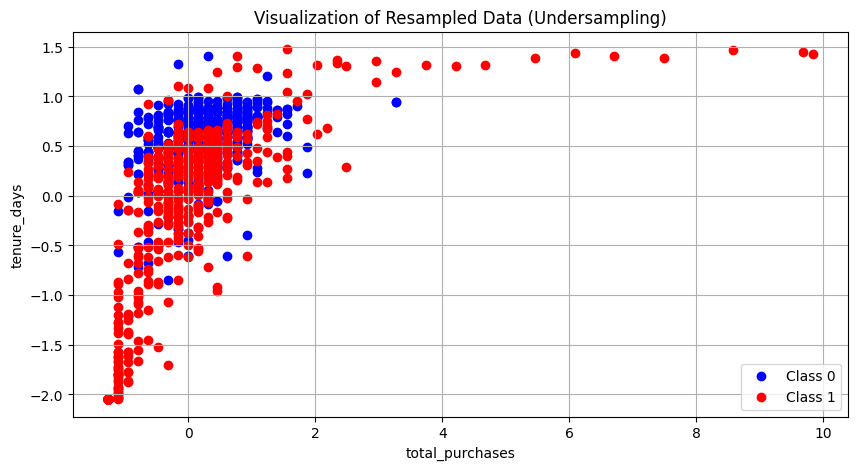

In [ ]:
# from imblearn.over_sampling import RandomOverSampler
# import matplotlib.pyplot as plt
# rus=RandomOverSampler(random_state=42)

# x_resampled,y_resampled=rus.fit_resample(X_train,Y_train)


# plt.figure(figsize=(10, 5))


# plt.scatter(
#     x_resampled[y_resampled == 0].iloc[:, 0], 
#     x_resampled[y_resampled == 0].iloc[:, 1],
#     color='blue', label='Class 0'
# )


# plt.scatter(
#     x_resampled[y_resampled == 1].iloc[:, 0], 
#     x_resampled[y_resampled == 1].iloc[:, 1],
#     color='red', label='Class 1'
# )

# plt.title("Visualization of Resampled Data (Undersampling)")
# plt.xlabel(x_resampled.columns[0])
# plt.ylabel(x_resampled.columns[1])
# plt.legend()
# plt.grid(True)
# plt.show()

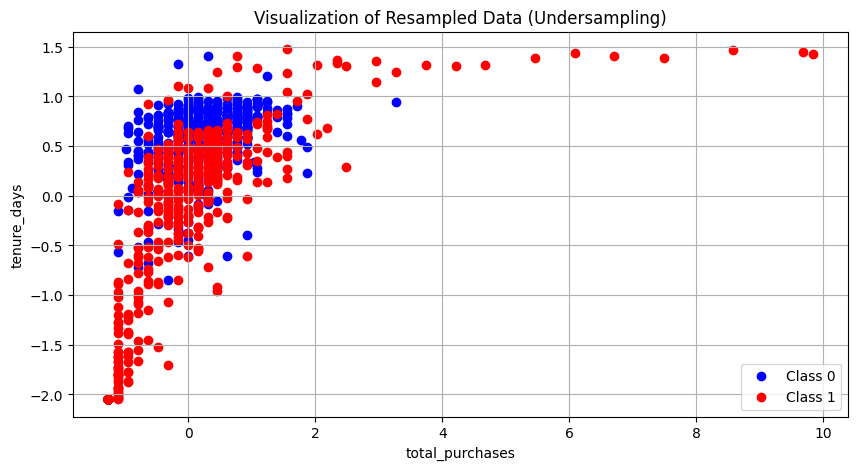

In [127]:
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
rus=SMOTE(random_state=42)

x_resampled,y_resampled=rus.fit_resample(X_train,Y_train)


plt.figure(figsize=(10, 5))


plt.scatter(
    x_resampled[y_resampled == 0].iloc[:, 0], 
    x_resampled[y_resampled == 0].iloc[:, 1],
    color='blue', label='Class 0'
)


plt.scatter(
    x_resampled[y_resampled == 1].iloc[:, 0], 
    x_resampled[y_resampled == 1].iloc[:, 1],
    color='red', label='Class 1'
)

plt.title("Visualization of Resampled Data (Undersampling)")
plt.xlabel(x_resampled.columns[0])
plt.ylabel(x_resampled.columns[1])
plt.legend()
plt.grid(True)
plt.show()

In [117]:
Y_train.value_counts()

status
1    584
0    479
Name: count, dtype: int64

In [118]:
y_resampled.value_counts()

status
0    584
1    584
Name: count, dtype: int64

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import cross_val_score
logistic=LogisticRegression()

scores = cross_val_score(logistic, x_resampled, y_resampled, cv=5, scoring='accuracy')
logistic.fit(x_resampled, y_resampled)
y_pred=logistic.predict(X_test)
classification=classification_report(Y_test,y_pred)
accuracy=accuracy_score(Y_test,y_pred)
print(classification)
print(accuracy)



              precision    recall  f1-score   support

           0       0.97      0.99      0.98       143
           1       0.99      0.96      0.98       123

    accuracy                           0.98       266
   macro avg       0.98      0.98      0.98       266
weighted avg       0.98      0.98      0.98       266

0.9774436090225563


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.01, 0.1, 1, 10, 100],      
    'solver': ['lbfgs', 'liblinear', 'saga'],  
    'max_iter': [100, 500, 1000]
}

grid_search = GridSearchCV(
    estimator=logistic,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(x_resampled, y_resampled)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


print("\nClassification :\n", classification_report(Y_test, y_pred))
print("Test Accuracy:", accuracy_score(Y_test, y_pred))

Fitting 5 folds for each of 135 candidates, totalling 675 fits
Best parameters: {'C': 1, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}
Best cross-validation score: 0.9991416309012877

Classification :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       143
           1       1.00      1.00      1.00       123

    accuracy                           1.00       266
   macro avg       1.00      1.00      1.00       266
weighted avg       1.00      1.00      1.00       266

Test Accuracy: 1.0


c:\Users\Gaurav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
300 fits failed out of a total of 675.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Gaurav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Gaurav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Gaurav\

In [121]:
from sklearn.svm import SVC

svc=SVC()

score=cross_val_score(svc,x_resampled,y_resampled,cv=5,scoring='accuracy')
svc.fit(x_resampled,y_resampled)
y_pred=svc.predict(X_test)
classification=classification_report(Y_test,y_pred)
print(classification)
accuracy=accuracy_score(Y_test,y_pred)
print(accuracy)

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       143
           1       0.98      0.93      0.95       123

    accuracy                           0.96       266
   macro avg       0.96      0.96      0.96       266
weighted avg       0.96      0.96      0.96       266

0.9586466165413534


In [122]:

svc=SVC()
param_grid = {
    'C': [0.1, 1, 10, 100],                
    'kernel': ['linear', 'rbf', 'poly'],    
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],  
    'degree': [2, 3, 4]                    
}

grid_search = GridSearchCV(
    estimator=svc,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(x_resampled, y_resampled)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


print("\nClassification :\n", classification_report(Y_test, y_pred))
print("Test Accuracy:", accuracy_score(Y_test, y_pred))

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best parameters: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation score: 0.997432229191886

Classification :
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       143
           1       0.98      1.00      0.99       123

    accuracy                           0.99       266
   macro avg       0.99      0.99      0.99       266
weighted avg       0.99      0.99      0.99       266

Test Accuracy: 0.9887218045112782


In [123]:
from sklearn.ensemble import RandomForestClassifier

random_forest=RandomForestClassifier()

score=cross_val_score(random_forest,x_resampled,y_resampled,cv=5,scoring='accuracy')
random_forest.fit(x_resampled,y_resampled)
y_pred=random_forest.predict(X_test)
classification=classification_report(Y_test,y_pred)
print(classification)
accuracy=accuracy_score(Y_test,y_pred)
print(accuracy)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       143
           1       0.98      1.00      0.99       123

    accuracy                           0.99       266
   macro avg       0.99      0.99      0.99       266
weighted avg       0.99      0.99      0.99       266

0.9924812030075187


In [124]:
random_forest=RandomForestClassifier()

param_grid={
    'n_estimators': [10, 50, 100, 200, 500],
    'max_depth': [None, 5, 10, 20, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 8]
}
grid_search=GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5,verbose=1,n_jobs=-1)
grid_search.fit(x_resampled,y_resampled)

print("Best parameters:",grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


print("\nClassification :\n", classification_report(Y_test, y_pred))
print("Test Accuracy:", accuracy_score(Y_test, y_pred))


Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Best parameters: {'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation score: 0.9905872858662559

Classification :
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       143
           1       0.98      1.00      0.99       123

    accuracy                           0.99       266
   macro avg       0.99      0.99      0.99       266
weighted avg       0.99      0.99      0.99       266

Test Accuracy: 0.9887218045112782


In [125]:
from xgboost import XGBClassifier

xgboost=XGBClassifier()

xgboost.fit(x_resampled,y_resampled)
y_pred=xgboost.predict(X_test)
classification=classification_report(Y_test,y_pred)
accuracy=accuracy_score(Y_test,y_pred)
print(classification)
print(accuracy)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       143
           1       0.99      0.99      0.99       123

    accuracy                           0.99       266
   macro avg       0.99      0.99      0.99       266
weighted avg       0.99      0.99      0.99       266

0.9924812030075187
